# Tutorial: Markov Chain and Discrete Dynamic Programming

## Computational Economics  (ECO309)


## Markov Chains

A worker’s employment dynamics obey the stochastic matrix

$$P = \begin{bmatrix}
1-\alpha & \alpha \\
\beta & 1-\beta
\end{bmatrix}$$

with $\alpha\in(0,1)$ and $\beta\in (0,1)$. First line corresponds to employment, second line to unemployment.

__Which is the stationary equilibrium?__

In [2]:
α = 0.1
β = 0.2

0.2

In [3]:
P = [
    (1-α) α;
    β (1-β)
]

2×2 Array{Float64,2}:
 0.9  0.1
 0.2  0.8

In [5]:
using LinearAlgebra: \, I

In [8]:
M = P' - I

2×2 Array{Float64,2}:
 -0.1   0.2
  0.1  -0.2

In [12]:
# replace the redundant line with 1s

M[2,:] .= 1
D = [0;1.0]

2-element Array{Float64,1}:
 0.0
 1.0

In [14]:
μ = M\D

2-element Array{Float64,1}:
 0.6666666666666667
 0.33333333333333326

In [16]:
μ'*P - μ'

1×2 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 0.0  0.0

In [31]:
### Alternate approach
M = P' - I
MM = [M; [1 1]]
DD = [0,0,1.0]

3-element Array{Float64,1}:
 0.0
 0.0
 1.0

I want a solution $μ$ s.t. MM μ = DD

In [32]:
MM\DD

2-element Array{Float64,1}:
 0.6666666666666667
 0.3333333333333332

__In the long run, what will the the fraction $p$ of time spent unemployed? (Denote by $X_m$ the fraction of dates were one is unemployed)__

__Illustrate this convergence by generating a simulated series of length 10000 starting at $X_0=1$. Plot $X_m-p$ against $m$. (Take $\alpha=\beta=0.1$).__

## Mine management (from Compecon)

A mine operator must decide how much ore to extract from a mine that will be shut down after $T$ years of operation.

The price of extracted ore is $p$ dollars per ton in any year, and the total cost of extaction given that the mine contains $s$ tons at the beginning of the year is $c(s,x)$ dollars. 

The mine currently contains $s_0$ tons of ore. Assuming the amount of ore extracted in any year must be an integer number of tons, what extraction schedule maximizes profits? 

Calibration: $p=1$, initial stock $\overline{s}=100$, cost of extraction $c(s,x)=\frac{x^2}{1+s}$ and annual discount factor $\delta=0.9$.

In [38]:
# has essentially the same syntax as Plots.jl but is much faster
using SimplePlots

In [2]:
using Plots

In [3]:
p = 1
N = 100
sbar = N
c(s,x) = x^2/(1+s)
δ = 0.9
r(s,x) = p * x - c(s,x)

r (generic function with 1 method)

__Define kind of problem, the state space, the actions, the reward function, and the Bellman updating equation__

- the state-space: tons of ore in the mine
    $$\mathcal{S} = [0,1,... 100]$$
- actions: amount extracted:
    $$x\in \mathcal{X}(s) = [0, 1, ..., s]$$
- reward: revenue from selling minus cost of extraction
    $$p x - c(s,x)$$
- values in the terminal state:
    - $V(0) = 0$, $x(0)=0$


In [39]:
# How do we store these objects:
# [ 0:100 ...]
S = 0:100 # doesn't use any memory

V = zeros(N+1)
V[:] .= NaN;
V[1] = 0;

pol = zeros(Int,N+1)

X(s) = 1:s

X (generic function with 1 method)

Bellman equation

$$V(s) = \max_{x\in{\mathcal{S(x)}}} r(s,x) + δ V(s-x)$$


In [40]:
findmax([0,5,0])

(5, 2)

__Solve the problem with the more adequate method__

In [41]:
#backward induction

for s=1:N
    
    gen = [ (r(s,x) + δ*V[s-x+1])  for x in X(s)]
    sol = findmax(gen)
    val = sol[1] # 
    x0 = sol[2] # same as X(s)[2]
    V[s+1] = val
    pol[s+1] = x0
    
end

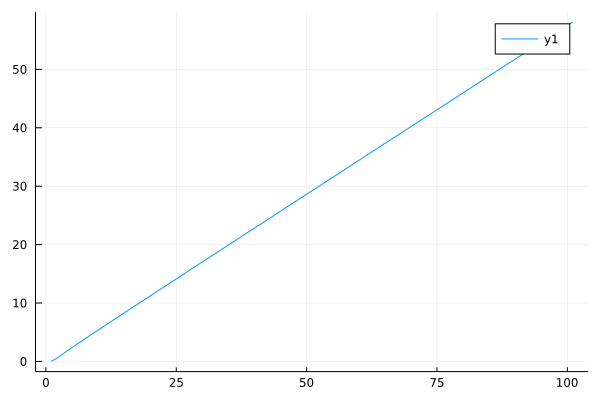

In [42]:
plot( V)

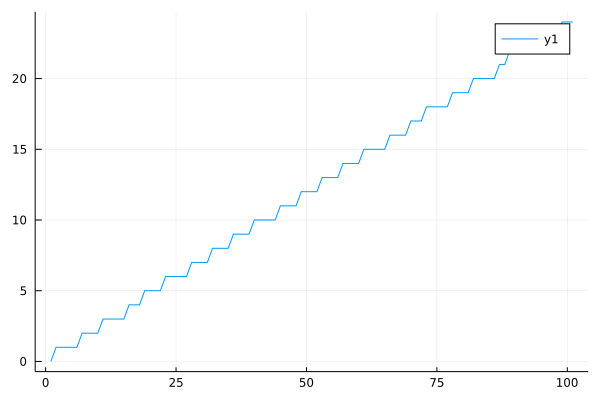

In [43]:
plot(pol)

In [44]:
function simulate(s, pol)
    l = [s]
    while s>1
        x = pol[s+1]
        S = s-x
        push!(l, S)
        s = S
    end
    return l
end

simulate (generic function with 1 method)

In [45]:
sim = simulate(N, pol)

15-element Array{Int64,1}:
 100
  76
  58
  44
  33
  25
  19
  14
  11
   8
   6
   4
   3
   2
   1

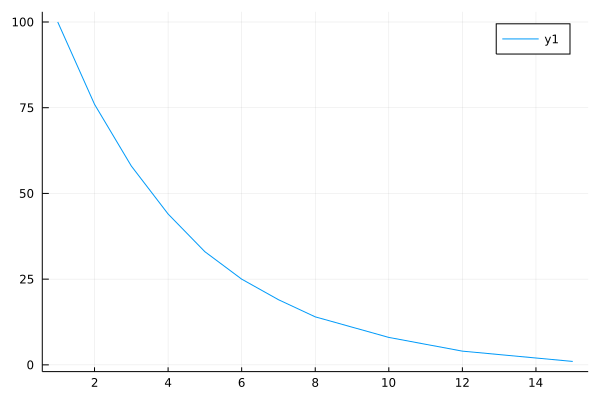

In [46]:
plot(sim)

## Asset replacement (from Compecon)

At the beginning of each year, a manufacturer must decide whether to continue to operate an aging physical asset or replace it with a new one.

An asset that is $a$ years old yields a profit contribution $p(a)$ up to $n$ years, at which point, the asset becomes unsafe and must be replaced by law.

The cost of a new asset is $c$. What replacement policy maximizes profits?

Calibration: profit $p(a)=50-2.5a-2.5a^2$. Maximum asset age: 5 years. Asset replacement cost: 75, annual discount factor $\delta=0.9$.

__Define kind of problem, the state space, the actions, the reward function, and the Bellman updating equation__

__Solve the problem using Value Function Iteration__

__Solve the problem using Policy Iteration. Compare with VFI.__

## Water management (Compecon)

Water from a reservoir can be used for either irrigation or recreation. Irrigatoin during the spring benefits farmers but reduces the reservoir level during the summer, damaging the interests of recreational users.

Specifically, if the reservoir contains $s$ units of water at the beginning of the year and $x$ units are released for irrigation, farmer and recreational user benefits during the year will be $F(x)$ and $U(s-x)$, respectively.

Reservoir levels are replenished by random rainfall during the winter. Specifically, it rains $k$ units with probability $p_k$ for$k=0,1,2, ...K$. The reservoir can hold only $M$ units of water, and excess rainfall flows out without benefit to either farmer or recreational user. 

What irrigation policy maximizes the sum of farmer and recreational user benfefits over an infinite time horizon?

Calibration: $F(x)=\alpha_1 x^{\beta_1}$, $G(x)=\alpha_2 (s-x)^{\beta_2}$ where $\alpha_1=14$, $\beta_1=0.8$, $\alpha_2=10$ and $\beta_2=0.4$. Reservoir capacity: $M=30$ and discount factor $\delta=0.9$. Probabilities that it rains 0,1,2,3,4 units: 0.1, 0.2, 0.4, 0.2 and 0.1.

__Define kind of problem, the state space, the actions, the reward function, and the Bellman updating equation__


__Solve the problem__